Integrantes: Benjamin Aguilar-
            Diego Cespedes

# Terremotos
Esta tarea tiene dos partes principales:

1) Revise el catálogo global de terremotos, haga un mapa que muestre la magnitud de los terremotos e interprete sobre dónde ocurren los terremotos más grandes. [40 puntos]

2) Trace el sismógrafo asociado con el terremoto más grande de 2020 y realice interpretaciones relacionadas con el tiempo de viaje de las ondas sísmicas. [60 puntos]

Para hacer estas cosas, deberá utilizar las bibliotecas de Python que hemos utilizado hasta ahora:

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader

## El catálogo global de terremotos
Revise el catálogo global de terremotos del Jupyter Notebook de la clase anterior con el objetivo de determinar dónde ocurren los terremotos de mayor magnitud. Puede comenzar importando los datos, nombre su dataframe EQ_data como en clase:

In [3]:
EQ_data = pd.read_csv('data/ANSS_2000_2012_final.csv',header=7)
EQ_data.head()

,DateTime,Latitude,Longitude,Depth,Magnitude,MagType,NbStations,Gap,Distance,RMS,Source,EventID
0,2000/01/01 01:19:26.99,41.927,20.543,10.0,4.8,ML,187,NaN,NaN,1.14,NEI,2.000010e+11
1,2000/01/01 02:12:13.45,-11.348,164.568,33.0,4.3,Mb,9,NaN,NaN,1.16,NEI,2.000010e+11
2,2000/01/01 04:30:10.37,-26.012,-68.803,105.0,4.5,Mb,44,NaN,NaN,0.91,NEI,2.000010e+11
3,2000/01/01 05:24:35.29,36.874,69.947,54.3,5.1,Mw,181,NaN,NaN,0.83,NEI,2.000010e+11
4,2000/01/01 05:58:19.78,-60.722,153.670,10.0,6.0,Mw,87,NaN,NaN,1.05,NEI,2.000010e+11


**Haga un mapa de estas ubicaciones de terremotos**

Haz un mapa en el que muestre las ubicaciones de los terremotos de mayor magnitud. Además de mostrar las ubicaciones de estos terremotos, muestre la ubicación de los límites de las placas tectónicas. Para hacerles más fácil el trabajo, he descargado los límites de las placas tectónicas proporcionadas por el Servicio Geológico de EE. UU. (USGS) y los dividí según su categorización en fosas (zonas de subducción como en Chile), dorsales (centros de expansión como en la mitad del Atlántico) y transformantes (como la falla de San Andrés  en California).  Si corres el código a continuación apareceran esos distintos tipos de límites.

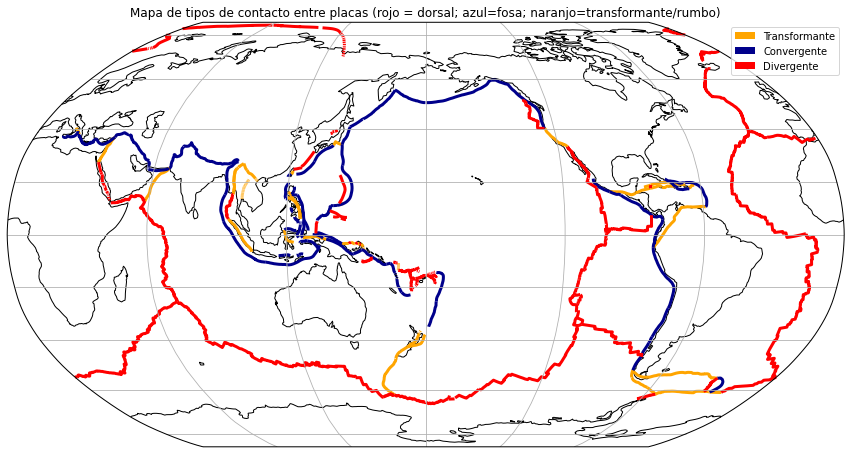

In [4]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.Robinson(180))
ax.set_global()

ax.coastlines()
ax.gridlines()

data = Reader('data/Plate_Boundaries_transform.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='orange', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_trenches.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='darkblue', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_ridges.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='red', facecolor='none',
                  linewidth=3)

plt.title('Mapa de tipos de contacto entre placas (rojo = dorsal; azul=fosa; naranjo=transformante/rumbo)')
# make patches to add to a legend
trans = mpatches.Rectangle((0, 0), 1, 1, facecolor="orange")
con = mpatches.Rectangle((0, 0), 1, 1, facecolor="darkblue")
div = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
labels = ['Transformante','Convergente','Divergente']
plt.legend([trans, con, div], labels)

plt.show()

**Haga un mapa donde se muestren estos límites de placas y también las ubicaciones de los terremotos de la última década.**


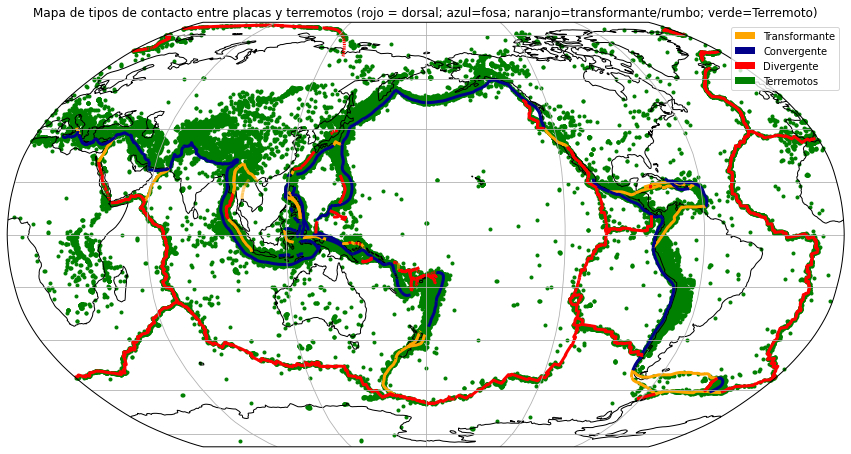

In [8]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.Robinson(180))
ax.set_global()

ax.coastlines()
ax.gridlines()

plt.scatter(EQ_data['Longitude'],EQ_data['Latitude'],marker='.',color='green',transform=ccrs.PlateCarree())

data = Reader('data/Plate_Boundaries_transform.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='orange', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_trenches.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='darkblue', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_ridges.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='red', facecolor='none',
                  linewidth=3)

plt.title('Mapa de tipos de contacto entre placas y terremotos (rojo = dorsal; azul=fosa; naranjo=transformante/rumbo; verde=Terremoto)')
# make patches to add to a legend
trans = mpatches.Rectangle((0, 0), 1, 1, facecolor="orange")
con = mpatches.Rectangle((0, 0), 1, 1, facecolor="darkblue")
div = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
terr= mpatches.Rectangle((0,0), 1 ,1, facecolor='green')
labels = ['Transformante','Convergente','Divergente','Terremotos']
plt.legend([trans, con, div, terr], labels)

plt.show()

**Haz un mapa que muestre los terremotos por magnitud.**

Filtre los datos del catálogo global de terremotos para crear 5 dataframes: uno que tenga los terremotos de magnitud entre 5 y 6, otro que solo tenga los terremotos de magnitud 6 y 7, y así sucesivamente. Haga un mapa donde muestre todos los terremotos, pero  diferencie cada grupo con un color  y tamaño distinto (los terremotos de mayor magnitud deberían tener un circulo más grande que los de magnitud menor). Los dataframe pueden ser filtrados de la siguente forma

In [12]:
earthquakes_mag5 = EQ_data[(EQ_data['Magnitude'] >= 5) & (EQ_data['Magnitude'] < 6)]
earthquakes_mag6 = EQ_data[(EQ_data['Magnitude'] >= 6) & (EQ_data['Magnitude'] < 7)]
earthquakes_mag7 = EQ_data[(EQ_data['Magnitude'] >= 7) & (EQ_data['Magnitude'] < 8)]
earthquakes_mag8 = EQ_data[(EQ_data['Magnitude'] >= 8) & (EQ_data['Magnitude'] < 9)]
earthquakes_mag9 = EQ_data[(EQ_data['Magnitude'] >= 9)]

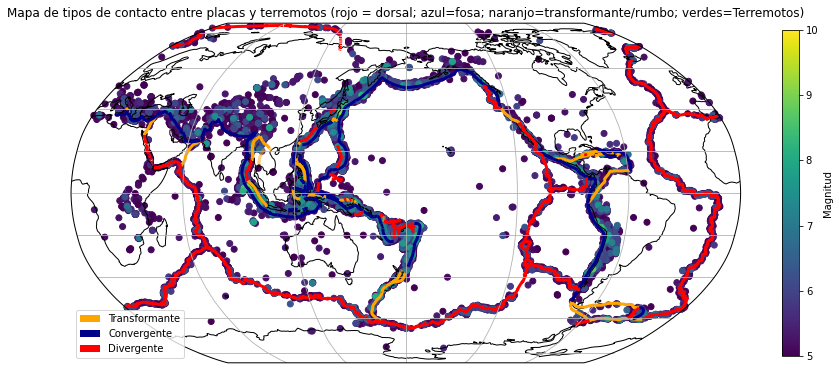

In [23]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.Robinson(180))
ax.set_global()

ax.coastlines()
ax.gridlines()

plt.scatter(earthquakes_mag5['Longitude'],earthquakes_mag5['Latitude'],c=earthquakes_mag5['Magnitude'],transform=ccrs.PlateCarree(),vmin = 5, vmax = 10)
plt.scatter(earthquakes_mag6['Longitude'],earthquakes_mag6['Latitude'],c=earthquakes_mag6['Magnitude'],transform=ccrs.PlateCarree(),vmin = 5, vmax = 10)
plt.scatter(earthquakes_mag7['Longitude'],earthquakes_mag7['Latitude'],c=earthquakes_mag7['Magnitude'],transform=ccrs.PlateCarree(),vmin = 5, vmax = 10)
plt.scatter(earthquakes_mag8['Longitude'],earthquakes_mag8['Latitude'],c=earthquakes_mag8['Magnitude'],transform=ccrs.PlateCarree(),vmin = 5, vmax = 10)
plt.scatter(earthquakes_mag9['Longitude'],earthquakes_mag9['Latitude'],c=earthquakes_mag9['Magnitude'],transform=ccrs.PlateCarree(),vmin = 5, vmax = 10)

data = Reader('data/Plate_Boundaries_transform.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='orange', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_trenches.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='darkblue', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_ridges.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='red', facecolor='none',
                  linewidth=3)

plt.title('Mapa de tipos de contacto entre placas y terremotos (rojo = dorsal; azul=fosa; naranjo=transformante/rumbo; verdes=Terremotos)')
# make patches to add to a legend
plt.colorbar(shrink=0.4,label='Magnitud')
trans = mpatches.Rectangle((0, 0), 1, 1, facecolor="orange")
con = mpatches.Rectangle((0, 0), 1, 1, facecolor="darkblue")
div = mpatches.Rectangle((0, 0), 1, 1, facecolor="red")
labels = ['Transformante','Convergente','Divergente']
plt.legend([trans, con, div], labels)

Una vez que haya elaborado dicho mapa, responda estas preguntas:

* ¿En qué tipo de límites de placas ocurren los terremotos más grandes?
* ¿A qué profundidades ocurren los terremotos más grandes? Para justificar esta pregunta haga un gráfico de profundidad vs magnitud de todos los terremotos. Para transfondo teórico este video le podría ser útil (https://youtu.be/fb9ytgi3br4).

Como se puede ver en el grafico, los terremotos mas grandes ocurren en las placas convergentes. Ahora si observamos el grafico obtenido al comparar las magnitudes y las profundidades, notaremos que los terremotos de magnitudes superiores a 8 ocurren a profundidades muy bajas cercanas a la superficie.

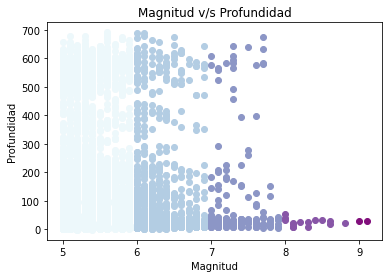

In [36]:
#Mapa profundidaes y magnitud

plt.scatter(earthquakes_mag5['Magnitude'],earthquakes_mag5['Depth'], color='#edf8fb')
plt.scatter(earthquakes_mag6['Magnitude'],earthquakes_mag6['Depth'], color='#b3cde3')
plt.scatter(earthquakes_mag7['Magnitude'],earthquakes_mag7['Depth'], color='#8c96c6')
plt.scatter(earthquakes_mag8['Magnitude'],earthquakes_mag8['Depth'], color='#8856a7')
plt.scatter(earthquakes_mag9['Magnitude'],earthquakes_mag9['Depth'], color='#810f7c')
plt.xlabel('Magnitud')
plt.ylabel('Profundidad')
plt.title('Magnitud v/s Profundidad')
plt.show()


## El terromoto más grande del 2020 (hasta ahora)

Durante este poco catastrófico 2020, el terremoto más grande hasta ahora ocurrió a 100 km al SSE de Perryville, Alaska a 55.0683°S 158.5543°W y fue un evento de magnitud 7.8.

A continuación se muestra un mapa de la ubicación del terremoto y la ubicación de la estación sísmica de Columbia College, Columbia, CA, EE. UU. que registró un registro sismográfico que analizaremos.

Complete el código con las coordenadas del terremoto.

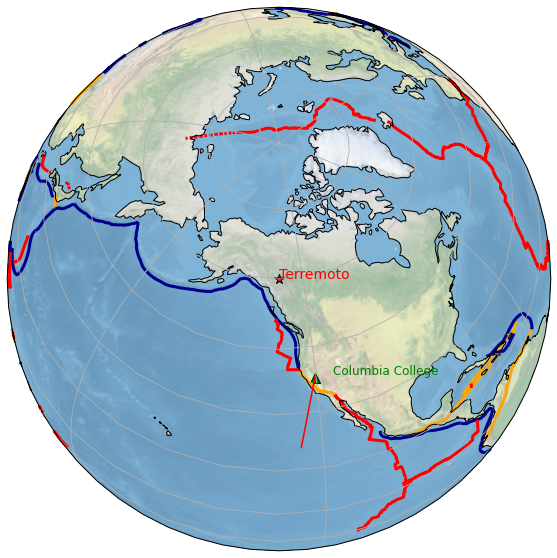

In [42]:
# Earthquake location
Earthquake_lat = 158.5543
Earthquake_lon = 55.0683

# Station Location Columbia College, Columbia, CA, USA
station_lat = 38.03455
station_lon = -120.38651

plt.figure(1,(10,10))

ax = plt.axes(projection=ccrs.Orthographic(central_longitude=-130,central_latitude=60))
ax.set_global()

plt.scatter(Earthquake_lon,Earthquake_lat,s=100,marker='*',
            color='red', edgecolor='black',transform=ccrs.PlateCarree())
plt.text(Earthquake_lon+5,Earthquake_lat,'Terremoto',fontsize=14,color='red',
         transform=ccrs.PlateCarree())

plt.scatter(station_lon,station_lat,s=100,marker='^',
            color='green', edgecolor='black',transform=ccrs.PlateCarree())
plt.text(station_lon+5,station_lat,'Columbia College',fontsize=12,color='green',
         transform=ccrs.PlateCarree())

plt.plot([Earthquake_lon,station_lon],[Earthquake_lat,station_lat],
         color='red',transform=ccrs.Geodetic())

data = Reader('data/Plate_Boundaries_transform.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='orange', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_trenches.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='darkblue', facecolor='none',
                  linewidth=3)

data = Reader('data/Plate_Boundaries_ridges.shp')
ax.add_geometries(data.geometries(), crs=ccrs.PlateCarree(), 
                  edgecolor='red', facecolor='none',
                  linewidth=3)

ax.coastlines()
ax.stock_img()
ax.gridlines()

plt.show()


¿En qué tipo de límite de placas ocurrió este terremoto?

Este terremoto ocurrio en una placa tipo convergente, lo que nos reafirma la hipotesis que de que lo terremotos de mayores magnitudes ocurren en limites convergentes

Se puede encontrar más información sobre el contexto geológico sobre este terremoto aquí: https://www.iris.edu/hq/files/programs/education_and_outreach/retm/tm_200722_alaska/200722_Alaska.pdf

## Cargar un sismograma 
Carguemos el archivo de datos .csv (variables separadas por comas) del sismograma del mayor terremoto ocurrido el mes pasado, registrado en la estación sísmica de Columbia College, Columbia, CA, EE. UU. Se tomaron muestras cada 0.025 segundos (40 Hz) y el registro comienza 60 segundos antes de la llegada de la onda P. https://www.iris.edu/app/station_monitor/#2020-07-22T06:12:44/BK-CMB/trace/BK-CMB|11273635

In [43]:
seismogram = pd.read_csv('data/BK.CMB.00.BHZ.Q.2020-07-22T061756.019538.csv',header=9,names=['Time','Sample'])
seismogram.head()

,Time,Sample
0,2020-07-22T06:17:56.044538Z,-2210
1,2020-07-22T06:17:56.069538Z,-2244
2,2020-07-22T06:17:56.094538Z,-2267
3,2020-07-22T06:17:56.119538Z,-2258
4,2020-07-22T06:17:56.144538Z,-2203


La columna 'Sample' es una serie de tiempo que indica la velocidad del movimiento del suelo en la ubicación de la estación sísmica debido a este terremoto. Cambiemos el nombre de velocidad.

In [44]:
velocity = seismogram['Sample']

Ahora transformemos la columna 'Time' de un string a un objeto de fecha y hora en pandas. Para hacer esto usamos la función ``pd.to_datetime()``. 

In [45]:
time = pd.to_datetime(seismogram['Time'])

*Plotinemos* el sismograma (tiempo en el eje x y velocidad en el eje y), agreguemos etiquetas y usemos ``ax.annotate`` para etiquetar las llegadas de las ondas P y S.

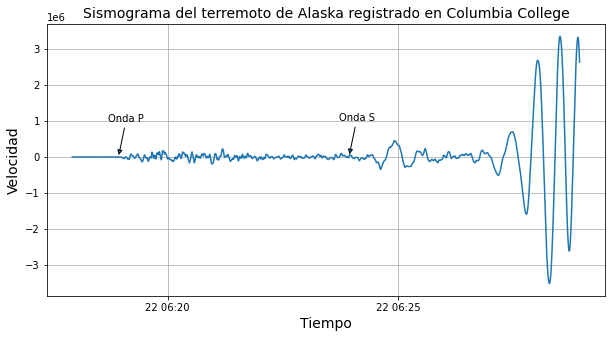

In [47]:
fig = plt.figure(1,(10,5))
ax = fig.add_subplot()

plt.plot(time,velocity)
plt.xlabel('Tiempo', fontsize=14)
plt.ylabel('Velocidad', fontsize=14)
plt.title('Sismograma del terremoto de Alaska registrado en Columbia College', fontsize=14)

ax.annotate('Onda P', (mdates.date2num(time[60*40]), velocity[60*40]), xytext=(-10, 35), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))
ax.annotate('Onda S', (mdates.date2num(time[6*60*40]), velocity[6*60*40]), xytext=(-10, 35), 
            textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

ax.grid(True)
plt.show()

Usando ``ax.annotate``, ha indicado cuándo llegó la onda P (en 2020-07-22 06:18:56 UTC) y cuándo llegó la onda S (5.0 minutos más tarde, 2020-07-22 06:23:56 UTC). La onda P (primaria) llega antes que la onda S (secundaria). Cuanto más lejos esté un terremoto de un receptor, más tiempo habrá entre las llegadas de las ondas P y S.

![](data/seis_wave_travel_time.png)

La diferencia en estos tiempos de llegada se puede usar para determinar la distancia desde la estación de registro al terremoto usando una curva de tiempo de viaje si conocemos las velocidades de las ondas a través de la Tierra. Entonces, primero necesitamos saber cómo se comportan estas dos ondas, en particular sus velocidades. Vea este breve video de demostración:

In [48]:
from IPython.display import Video
Video("https://www.iris.edu/hq/inclass/uploads/videos/xSP_006_GraficoTiempoDeViaje.mp4")

Encontré los tiempos de viaje de las ondas P y S calculados para un terremoto a 33 km de profundidad aquí (https://earthquake.usgs.gov/learn/topics/ttgraph.php) que se basa en este estudio:

*Kennett, B. L. N. and E. R. Engdahl (1991). Travel times for global earthquake location and phase identification, Geophys. J. Int., v 105, p 429-465.*

Los datos se encuentran dentro de la carpeta data como arrival_times.csv. Importémoslos como un dataframe.

In [49]:
travel_times = pd.read_csv('data/arrival_times.csv')
travel_times.head()

,degrees_from_quake,P_wave_time,S_wave_time
0,0.0,0.090000,0.156667
1,0.5,0.176667,0.306667
2,1.0,0.295000,0.520000
3,1.5,0.410000,0.726667
4,2.0,0.523333,0.930000


Muestre en un gráfico con los diferentes tiempos de viaje de las ondas sismicas.

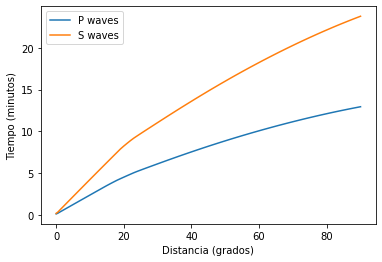

In [50]:
plt.plot(travel_times['degrees_from_quake'],travel_times['P_wave_time'],label='P waves')
plt.plot(travel_times['degrees_from_quake'],travel_times['S_wave_time'],label='S waves')
plt.xlabel('Distancia (grados)')
plt.ylabel('Tiempo (minutos)')
plt.legend()
plt.show()

De la interpretación del sismógrafo, sabemos que en Columbia College, la onda S llegó 5.0 minutos después de la onda P. Queremos usar esta curva de tiempo de viaje para estimar la distancia. Para empezar, cree una nueva columna en el dataframe 'travel_times' que sea la diferencia entre los dos tiempos. En pandas puedes hacer una nueva columna que sea un cálculo de otras columnas. Entonces, si tuviera una columna llamada 'column_b' y una llamada 'column_a', podría crear una nueva columna como esta:

viajes_tiempo['nueva_columna'] = viaje_tiempo['columna_b'] - viaje_tiempo['columna_a']

Continúe y cree una nueva columna llamada 'S-P_difference' que es la diferencia entre el tiempo de la onda S y el tiempo de la onda P. Luego, haz una gráfica de  la diferencia de los tiempos entre P y S versus distancia del terremoto.

In [62]:
travel_times['S-P_difference']=travel_times['S_wave_time']-travel_times['P_wave_time']

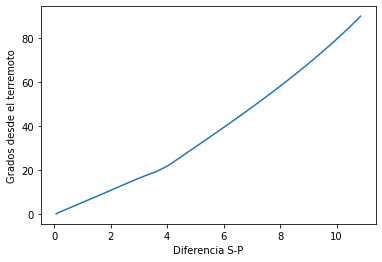

In [66]:
plt.plot(travel_times['S-P_difference'],travel_times['degrees_from_quake'])
plt.xlabel('Diferencia S-P')
plt.ylabel('Grados desde el terremoto')
plt.title('')
plt.show()

In [76]:
columbia=travel_times[ travel_times['S-P_difference']<=5]
columbia_time=max(columbia['S-P_difference'])
columbia_degrees=columbia['degrees_from_quake'][columbia['S-P_difference']==columbia_time]
print(columbia_degrees)

40    30.0
Name: degrees_from_quake, dtype: float64


Una vez que haya trazado la curva que muestra la diferencia de tiempo de viaje entre la onda P y S, úsela para estimar la distancia en grados entre la estación y  el terremoto. Luego, convierta esta distancia angular entre el terremoto y la estación sísmica con la ecuación $ d = r \theta $ donde $ d $ es la distancia entre los dos puntos, $ r $ es el radio (el radio de la Tierra es 6371 kilómetros), y $ \theta $ es la separación angular entre los puntos en radianes.

In [77]:
radius = 6371; # Radio de la Tierra en km
ang_deg = columbia_degrees; # separación angular terremoto - estación
ang_rad = ang_deg * np.pi/180; # conversión radianes - grados
dist = radius * ang_rad; # distancia en kilometros
print(dist) 
print('distancia en kilometros del epicentro del terremoto hacia la estación (km)')

40    3335.847799
Name: degrees_from_quake, dtype: float64
distancia en kilometros del epicentro del terremoto hacia la estación (km)
